In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('prosperLoanData.csv')

In [5]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [21]:
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]

GroupKey                               100596
LoanFirstDefaultedCycleNumber           96985
ScorexChangeAtTimeOfListing             95009
ProsperPrincipalOutstanding             91852
ProsperPrincipalBorrowed                91852
ProsperPaymentsOneMonthPlusLate         91852
ProsperPaymentsLessThanOneMonthLate     91852
OnTimeProsperPayments                   91852
TotalProsperLoans                       91852
TotalProsperPaymentsBilled              91852
CreditGrade                             84984
ClosedDate                              58848
ProsperRating (Alpha)                   29084
ProsperScore                            29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
EstimatedLoss                           29084
EstimatedEffectiveYield                 29084
DebtToIncomeRatio                        8554
EmploymentStatusDuration                 7625
AmountDelinquent                         7622
CurrentCreditLines                

In [29]:
missing_percent = df.isna().sum()/len(df)

In [39]:
list_to_drop = missing_percent[missing_percent > 0.5].sort_values(ascending=False).index

In [40]:
list_to_drop

Index(['GroupKey', 'LoanFirstDefaultedCycleNumber',
       'ScorexChangeAtTimeOfListing', 'TotalProsperLoans',
       'TotalProsperPaymentsBilled', 'OnTimeProsperPayments',
       'ProsperPaymentsLessThanOneMonthLate',
       'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed',
       'ProsperPrincipalOutstanding', 'CreditGrade', 'ClosedDate'],
      dtype='object')

In [42]:
df.drop(list_to_drop,axis=1,inplace=True)

In [47]:
missing_check = df.isna().sum()/len(df)
missing_check[missing_check > 0].sort_values(ascending=False)

EstimatedLoss                         0.255264
EstimatedReturn                       0.255264
ProsperRating (numeric)               0.255264
ProsperRating (Alpha)                 0.255264
ProsperScore                          0.255264
EstimatedEffectiveYield               0.255264
DebtToIncomeRatio                     0.075077
EmploymentStatusDuration              0.066923
AmountDelinquent                      0.066897
CurrentCreditLines                    0.066739
BankcardUtilization                   0.066739
RevolvingCreditBalance                0.066739
PublicRecordsLast12Months             0.066739
OpenCreditLines                       0.066739
TradesOpenedLast6Months               0.066212
TradesNeverDelinquent (percentage)    0.066212
TotalTrades                           0.066212
AvailableBankcardCredit               0.066212
BorrowerState                         0.048404
Occupation                            0.031491
EmploymentStatus                      0.019792
TotalInquirie

In [53]:
missings = df.isna().sum().sort_values(ascending=False)
list_of_rows_to_drop = missing[(missing > 0) & (missing < 1200)].index

In [58]:
list_of_rows_to_drop

Index(['TotalInquiries', 'DelinquenciesLast7Years', 'FirstRecordedCreditLine',
       'PublicRecordsLast10Years', 'TotalCreditLinespast7years',
       'CurrentDelinquencies', 'InquiriesLast6Months', 'CreditScoreRangeUpper',
       'CreditScoreRangeLower', 'BorrowerAPR'],
      dtype='object')

In [59]:
df.dropna(subset=list_of_rows_to_drop,inplace=True
         )

In [62]:
missing_check = df.isna().sum()/len(df)
missing_check[missing_check > 0].sort_values(ascending=False)

EstimatedEffectiveYield               0.246949
EstimatedLoss                         0.246949
EstimatedReturn                       0.246949
ProsperRating (numeric)               0.246949
ProsperRating (Alpha)                 0.246949
ProsperScore                          0.246949
DebtToIncomeRatio                     0.074903
EmploymentStatusDuration              0.056683
OpenCreditLines                       0.056497
PublicRecordsLast12Months             0.056497
RevolvingCreditBalance                0.056497
BankcardUtilization                   0.056497
CurrentCreditLines                    0.056497
AmountDelinquent                      0.056479
AvailableBankcardCredit               0.055982
TotalTrades                           0.055982
TradesNeverDelinquent (percentage)    0.055982
TradesOpenedLast6Months               0.055982
BorrowerState                         0.041055
Occupation                            0.021468
EmploymentStatus                      0.009638
dtype: float6

In [72]:
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]

ProsperScore                          27826
EstimatedEffectiveYield               27826
ProsperRating (Alpha)                 27826
ProsperRating (numeric)               27826
EstimatedReturn                       27826
EstimatedLoss                         27826
DebtToIncomeRatio                      8440
EmploymentStatusDuration               6387
RevolvingCreditBalance                 6366
PublicRecordsLast12Months              6366
CurrentCreditLines                     6366
BankcardUtilization                    6366
OpenCreditLines                        6366
AmountDelinquent                       6364
TradesOpenedLast6Months                6308
TradesNeverDelinquent (percentage)     6308
TotalTrades                            6308
AvailableBankcardCredit                6308
BorrowerState                          4626
Occupation                             2419
dtype: int64

In [71]:
df["EmploymentStatus"].value_counts()
df["EmploymentStatus"].fillna("Not available",inplace=True)
df["EmploymentStatus"].value_counts()


C:\Users\antek\AppData\Local\Temp\ipykernel_14088\1058264498.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["EmploymentStatus"].fillna("Not available",inplace=True)


EmploymentStatus
Employed         67322
Full-time        26343
Not available     6364
Self-employed     6132
Other             3806
Part-time         1084
Not employed       833
Retired            795
Name: count, dtype: int64

In [67]:

df['Occupation'].value_counts()
# do rozkminia

Occupation
Other                          28594
Professional                   13628
Computer Programmer             4475
Executive                       4310
Teacher                         3757
                               ...  
Dentist                           68
Student - College Freshman        41
Student - Community College       28
Judge                             22
Student - Technical School        15
Name: count, Length: 67, dtype: int64

In [74]:
df["AvailableBankcardCredit"].mean()

11212.12964999859

<Axes: >

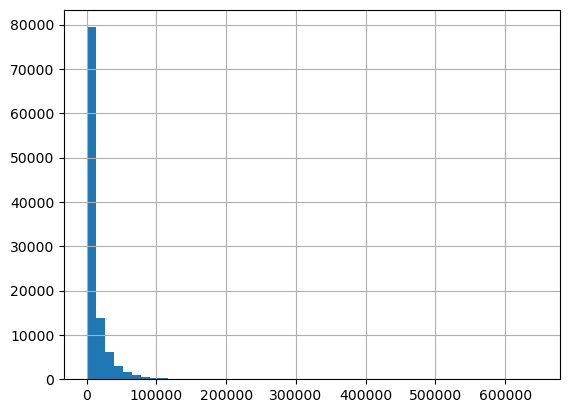

In [77]:
df["AvailableBankcardCredit"].hist(bins=50)

In [80]:
df[df['AvailableBankcardCredit'] == 0]['AvailableBankcardCredit']

31        0.0
97        0.0
111       0.0
113       0.0
127       0.0
         ... 
113835    0.0
113839    0.0
113843    0.0
113846    0.0
113859    0.0
Name: AvailableBankcardCredit, Length: 4876, dtype: float64

In [81]:
df["AvailableBankcardCredit"].max()

646285.0

In [82]:
df[df['AvailableBankcardCredit'] > 100000]['AvailableBankcardCredit'].count()
# moze do usunieca

750

In [84]:
df['TotalTrades'].value_counts()

TotalTrades
17.0     3800
20.0     3775
18.0     3766
19.0     3745
16.0     3728
         ... 
101.0       1
114.0       1
92.0        1
98.0        1
118.0       1
Name: count, Length: 108, dtype: int64